# Backtesting from Excel

In [1]:
%load_ext autoreload

## TO DO
 1. Backtest to run without conditions
 2. Backtest to run without columns

In [11]:
import pandas as pd
import seaborn as sns
from fastbt.datasource import DataSource
sns.set()

In [18]:
df = pd.read_hdf('../../data.h5', 'data/eod', 
                   where='(series=="EQ")')
universe = pd.read_excel('../../files/IndexConstituents.xlsx', 'Recommend2' 
                         ).Symbol.values.ravel()
data = df[df['symbol'].isin(universe)].drop_duplicates().reset_index(drop=True)


In [14]:
from fastbt.rapid import *

In [25]:
results = backtest_from_excel('/home/machine/Desktop/Backtest/bt10.xls',
                    data=data)

In [24]:
results

,symbol,series,open,high,low,close,last,prevclose,tottrdqty,tottrdval,...,price,stop_loss,buy,sell,cnt,qty,profit,commission,slippage,net_profit
5,OIL,EQ,390.10,393.95,385.00,389.05,388.05,383.00,281313,1.094669e+08,...,387.05,375.45,387.05,389.05,58,4.0,8.00,0.0,0.0,8.00
25,KSCL,EQ,355.50,363.40,351.00,357.00,357.50,350.75,3249319,1.158885e+09,...,352.70,342.10,352.70,357.00,58,5.0,21.50,0.0,0.0,21.50
102,IGL,EQ,534.00,534.30,525.00,526.95,527.40,529.00,386040,2.040561e+08,...,529.80,513.90,529.80,526.95,58,3.0,-8.55,0.0,0.0,-8.55
53,TATACHEM,EQ,405.00,410.00,402.00,408.90,407.75,401.45,249430,1.014399e+08,...,401.80,389.75,408.90,408.90,58,4.0,0.00,0.0,0.0,0.00
3,PAGEIND,EQ,13465.00,13850.00,13425.00,13510.35,13470.00,13369.65,4802,6.509874e+07,...,13359.25,12958.45,13510.35,13510.35,58,0.0,0.00,0.0,0.0,0.00
110,HEXAWARE,EQ,245.10,245.10,242.00,242.50,242.50,243.40,245262,5.962196e+07,...,243.20,235.90,243.20,242.50,58,7.0,-4.90,0.0,0.0,-4.90
13,MINDTREE,EQ,1443.00,1452.90,1434.10,1441.55,1441.80,1433.75,47079,6.799919e+07,...,1431.65,1388.70,1441.55,1441.55,58,1.0,0.00,0.0,0.0,0.00
44,TECHM,EQ,524.90,524.90,518.50,520.05,520.70,521.65,312042,1.626277e+08,...,520.80,505.20,520.80,520.05,58,3.0,-2.25,0.0,0.0,-2.25
101,INDIACEM,EQ,97.45,101.70,95.90,99.25,98.35,96.85,6306964,6.259030e+08,...,96.70,93.80,96.70,99.25,58,18.0,45.90,0.0,0.0,45.90
37,VEDL,EQ,90.90,92.00,90.15,91.65,91.85,90.40,4355053,3.970989e+08,...,90.20,87.50,90.20,91.65,58,19.0,27.55,0.0,0.0,27.55


In [11]:
df2 = df.iloc[:10000]
import tempfile
fp = tempfile.NamedTemporaryFile()
df2.to_csv(fp.name, compression='zip')


In [9]:
df.iloc[:10000].to_csv('/home/machine/Desktop/results.csv', index=False)

In [8]:
df.iloc[:10000].to_csv('~/results.csv.zip', index=False, compression='zip')

In [4]:
params = {
    'price': 'open * 0.999',
    'stop_loss': 3,
    'order': 'S',
    'sort_by': 'ret',
    'sort_mode': False,
    'data': data,
    'commission': 0.035,
    'slippage': 0.05,
    'limit': 5
}
columns = [
    {'P': {'on': 'close', 'lag': 1, 'col_name': 'ret'}},
    {'F': {'formula': '(open/prevclose) - 1', 'col_name': 'pret'}}
]
conditions = [
    'pret > 0'
    
]
params.update({'columns': columns, 'conditions': conditions})

In [5]:
%autoreload
from fastbt.rapid import *

In [6]:
result = backtest(**params)

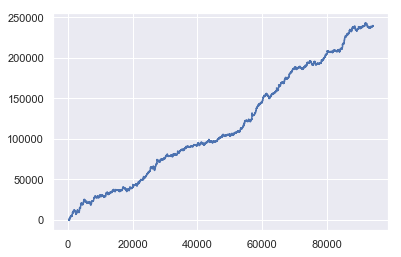

In [12]:
result.net_profit.cumsum().plot()

In [8]:
result2 = backtest_from_excel('../../bt.xls', data=data)

In [9]:
data = pd.read_csv('data/data.csv', parse_dates=['timestamp'])

In [10]:
%autoreload
result3 = backtest_from_excel('../../btpp.xls', data=data.dropna())

In [13]:
result3.net_profit.sum()

-11814.275325000217